# __Webscraper para obter conteúdo de artigo__
### __Autor__: Lucas Vicente Nascimento
### __Data__: 19/03/2024
### __Introdução__
> O intuito deste projeto foi para praticar minhas habilidades com raspagem de dados e tambem integrar o uso de outras ferramentas e boas práticas de programação, documentação e desenvolvimento de portfolio e progressão de skills.

> __Disclaimer 1:__ Por conta do requisito sobre o artigo poder ser de minha escolha, ressalvo que o código desenvolvido aqui foi obviamente baseado pelo código HTML desta URL em específico. Logo, este código não pode ser usado com outro website.
O artigo que utilizei para o projeto é da página de notícias sobre o mercado financeiro, o InfoMoney.
Segue a URL: [De FAAMG para Sete Maravilhas ou Quarteto Fantástico: afinal, as big techs estão mesmo caras?](https://www.infomoney.com.br/colunistas/convidados/de-faamg-para-sete-maravilhas-ou-quarteto-fantastico-afinal-as-big-techs-estao-mesmo-caras/)

> __Disclaimer 2:__ O nome das funções, variáveis, loops e etc estão em inglês por conta do website em que aceitei este desafio. Então desenvolvi o código em inglês para os avaliadores do idioma em questão. Mas ainda sim, toda explicação e comentários estão lindos em __Português-BR__. ^^

### __Processo de Desenvolvimento__
##### 1. __Entender o objetivo esperado__
Construir um simples web scraper que irá retornar o conteúdo de um artigo de notícias quando fornecido um URL específico. Alguns exemplos de produtos reais que utilizam tecnologias semelhantes incluem websites de rastreamento de preços e ferramentas de auditoria de SEO que podem extrair os principais resultados de busca.

##### 2. __Entendimento dos requisitos__
* Escolha um site de notícias. Dado um URL específico de um artigo do site escolhido, retorne o título e o conteúdo do artigo para o usuário.
* __Para um desafio extra__: Analise informações como o título do artigo, data de atualização e autoria para retorná-las separadamente ao usuário.

##### 3. __Escolha de ferramentas__
* Python (versão: 3.11.8)
    * Requests(acessar a página)
    * BeautifulSoup (parseamento da página)
* Documentação BeautifulSoup
* ChatGPT
* Git
* GitHub
* VSCode
* Jupyter Notebook

##### 4. __Definição de cronograma__
> Inicialmente defini um prazo de 3 dias, mas na verdade consegui concluir em 10 horas!

##### 5. __Rascunho do algoritmo a ser seguido__
1. Entra URL;
2. Carregar página;
3. Extrair título;
4. Extrair Data e Hora;
5. Extrair Nome do Autor;
6. Extrair Conteúdo;

##### 6. __Codificação e testes__

In [17]:
#Importar livrarias para acessar o conteudo e parsear
import requests as requests
from bs4 import BeautifulSoup

#Função pra receber a URL
def get_article(url):

    #Carregar a página
    page = requests.get(url).text
    data = BeautifulSoup(page, 'html.parser')

    #Raspando informação da página
    title = data.find('h1') #Começando pelo título, é claro :)
    for h1 in title:
        print(f'Title: {title.text}')

    date = data.find('time') #Data em que o artigo foi escrito
    for time in date:
        print(f'Date: {date.text}')

    #Extrair informações sobre o autor
    finding_div_tag = data.find("div", class_="single__author-info") #Encontrando a tag <div>
    finding_span_tag = finding_div_tag.find("span", class_="typography__body--5") #Encontrando a tag <span>
    text = finding_span_tag.get_text(separator=" ", strip=True) #Finalmente obter o texto que queremos 
    print(f'Author {text}')

    #Extrair conteúdo do artigo
    '''
    Aqui temos duas seções do artigo. A primeira é o disclaimer e a segunda é o conteúdo de fato.
    '''
    content_div_tag = data.find('div', class_='single__content')
    disclaimer_div_tag = content_div_tag.find('div', class_="single__disclaimer")
    disclaimer_div_tag_content = disclaimer_div_tag.get_text(separator=" ", strip=True)
    print(f"Disclaimer: '\n' {disclaimer_div_tag_content}") #Disclaimer

    elementb_div_tag = content_div_tag.find('div', class_="element-border--bottom spacing--pb4")
    content_text = elementb_div_tag.get_text(separator=" ", strip=True)
    print(f"Content: '\n' {content_text}") #Conteúdo completo    

In [18]:
#Chamada e teste da função
get_article('https://www.infomoney.com.br/colunistas/convidados/de-faamg-para-sete-maravilhas-ou-quarteto-fantastico-afinal-as-big-techs-estao-mesmo-caras/')

Title: De FAAMG para Sete Maravilhas ou Quarteto Fantástico: afinal, as big techs estão mesmo caras?
Date: 17 mar 2024 09h30
Author Por Matheus Popst
Disclaimer: '
' info_outline Importante: os comentários e opiniões contidos neste texto são responsabilidade do autor e não necessariamente refletem a opinião do InfoMoney ou de seus controladores
Content: '
' The Magnificent Seven é um filme de faroeste de 1960 dirigido por John Sturges – mas o termo voltou à cena no ano passado em um contexto bem diferente. Quando duas empresas (Tesla e Nvidia) se juntaram ao grupo das companhias de tecnologia com mega capitalização no mercado, o acrônimo FAAMG (Facebook, Apple, Amazon, Microsoft e Google) foi renomeado como as “Sete Maravilhas”. Em 2023, todas elas superaram o retorno do S&P500. A “pior” do do grupo – a Apple – subiu 49% no ano. A Nvidia, a melhor delas, avançou 239%. O desempenho em 2024 não é tão equilibrado: a Apple cai 7% e a Tesla perde 30%, enquanto a Meta e a Nvidia sobem 43% e 

##### __7. Desafios enfrentados e soluções__
- __Identificação correta dos elementos HTML para coleta de dados;__
> Não tenho um background em HTML, e como iniciante em programação, este foi um desafio dificil quando não se sabe o que está fazendo e tolo pra quando você tem um momento "EUREKA!". Uma lição básica que aprendi quanto a lidar com tags é prestar minuciosa atenção, já que temos tantas _div_ dentro de _div_ que contém _span_ mas que nosso texto se encontra num _a_ dentro de _p_ hahahahaha.

> __Solução:__ Quebrar a cabeça lendo documentação, tirando dúvidas com ChatGPT com relação ao funcionamento das tags, tudo isso pra me certificar de que meu código estava encontrando as tags. 

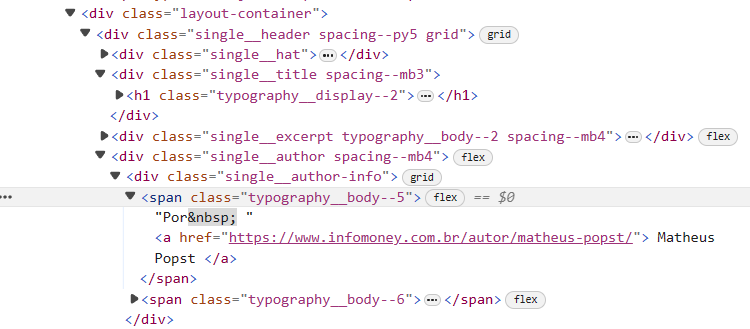

- __Tratamento de erros e exceções durante os testes;__
>Vou ficar devendo os prints dos inúmeros erros que recebi no console, mil desculpas!

> __Solução:__ Utilizei como inspiração um código que desenvolvi nos exercícios do coursera, mas a diferença é que lá extraímos tabelas e não textos.

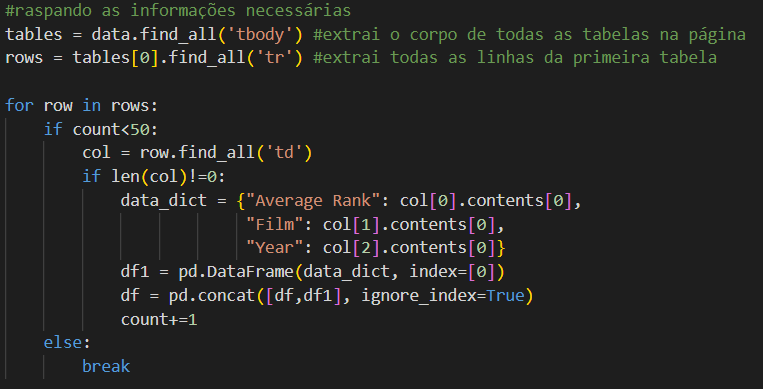

### __Resultados e impactos__
- Conhecimento e prática de tags HTML;
- Aplicação prática de boas práticas de programação;
- Aprimoramento no desenvolvimento de algoritmo, permitindo assim, uma melhor estruturação do código;

### __Documentação, Uploads e Postagens__
__Links Relevantes__
- [Repositório GitHub do Projeto](https://github.com/Lucas-Nascimento-Tech/Dev-Projects-Repo)
- [Documentação do Projeto](https://github.com/Lucas-Nascimento-Tech/Dev-Projects-Repo/blob/main/README-(PT-BR).md)
- [Meu portfolio de projetos e outras informações](https://lucasnascimentoportfolio.carrd.co/#)
